# Gradient Descent with Multiple Minima
This shows and example of the difficulties in using the gradient descent algorithm when there are multiple minima. The problem is basically that you can get caught descending into one of the minima - but is that the lowest point of the cost function (i.e., is it the lowest minima.

To investigate this, the following function is used:
$$ g(x) = x^4 - 4x^2 + 5 $$

## Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create 1000 data points in the range +/2 for the x variables.
xData = np.linspace(start=-2, stop=2, num=1000)

## Cost Function $g(x)$ and Derivative Function $dg(x)$
The derivative function of $g(x)$ is:
$$ dg(x) = 4 x^3 - 8x $$

In [4]:
# Create Python functions for the cost function and derivative function:
def g(x) :
    return x**4 - 4 * x**2 + 5

def dg(x) :
    return 4 * x**3 - 8 * x

### Plot the Cost Function and the Derivative Function

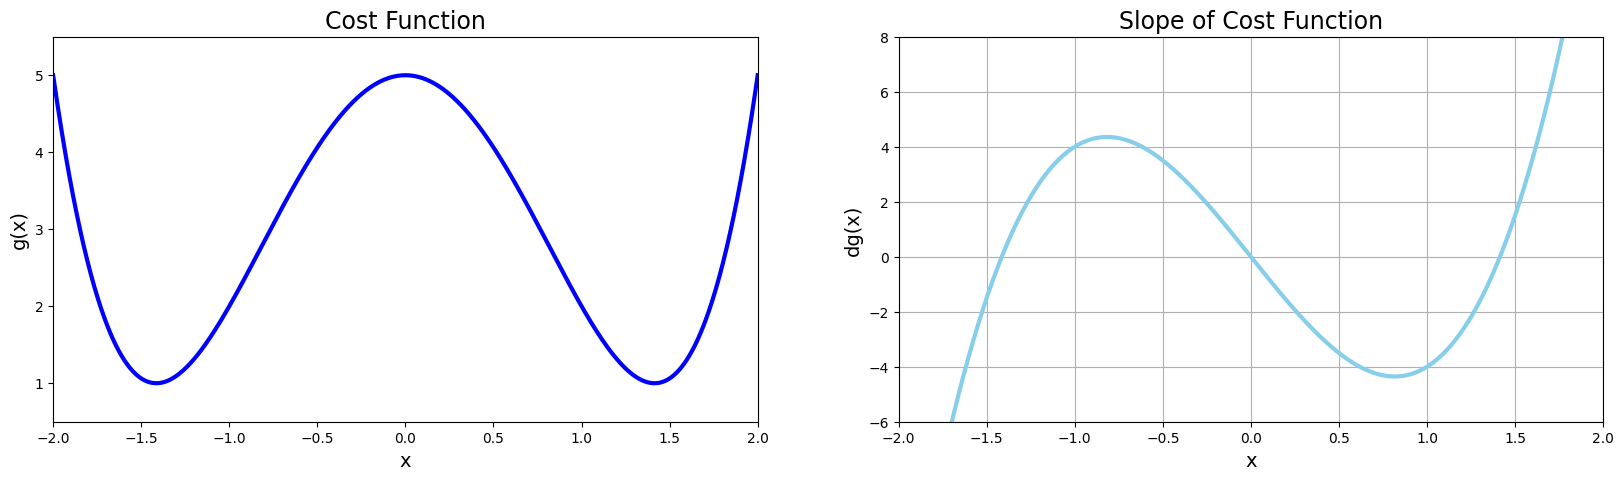

In [5]:
plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3)


The above figures illustrate where there might be some difficulties with the gradient descent algorithm:

1. There are two minima - with both appearing to have the same minimum value.
2. The function for the **Slope of the Cost Function** has three places where it is zero - the centre one indicating the maxima in the Cost Function where the slope of the Cost Function is also zero (not just at the two minima).

These will make it difficult for the gradient descent algorithm to determine the minima for the cost function.

## Create Python Function to Perform Gradient Descent

In [8]:
def gradient_descent(derivative_function, initial_guess, multiplier=0.02, precision=0.001) :
    new_x = initial_guess
    x_list = []
    slope_list = []

    for n in range(500) :
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))

        if step_size < precision :
            break

    return new_x, x_list, slope_list

local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=-0.5)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))


Local minimum occurs at:  -1.4122375085019094
Number of steps:  22


In [18]:
local_minimum, list_x, derivative_list = gradient_descent(derivative_function=dg, initial_guess=0.1, multiplier=0.01, precision=0.0001)
print('Local minimum occurs at: ', local_minimum)
print('Number of steps: ', len(list_x))

Local minimum occurs at:  1.413709226894381
Number of steps:  76


## Plot Cost Functions and Gradient Descent Points

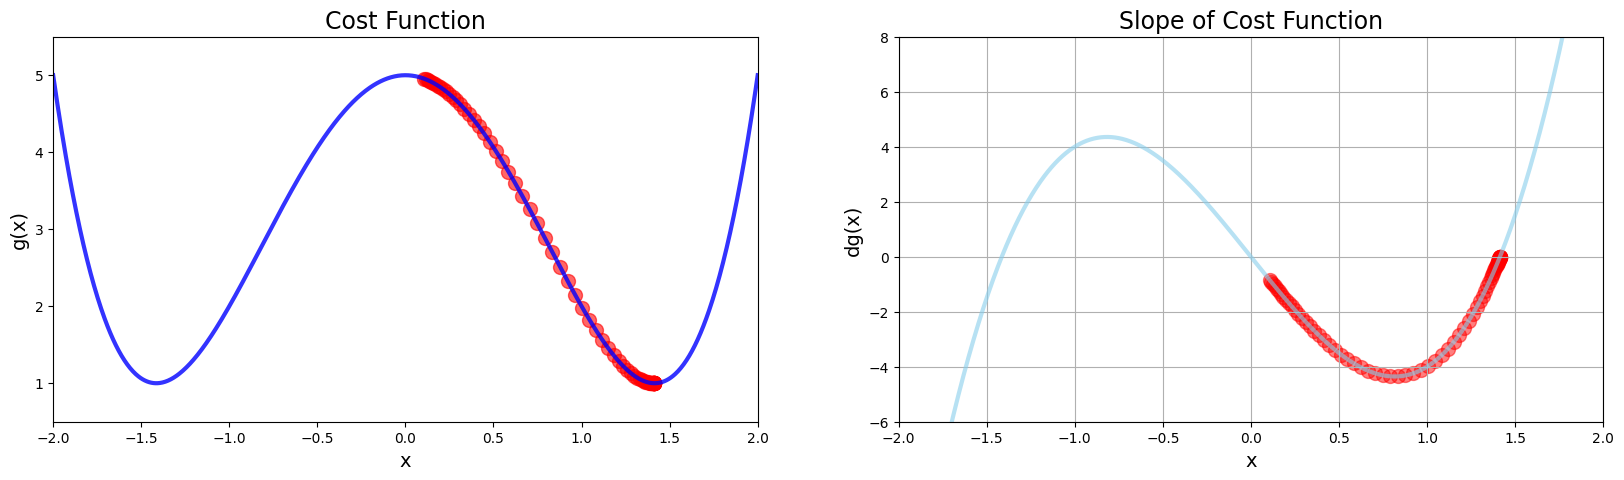

In [19]:
plt.figure(figsize=[20, 5])

# Plot 1 - Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)

plt.plot(xData, g(xData), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Plot 2 - Derivative Function
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.grid()

plt.plot(xData, dg(xData), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, derivative_list, color='red', s=100, alpha=0.5)